# 1. LOAD CSV FILE 
# 2. COUNT OF TOTAL RECORDS AND NULL VALUES

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


dataset =pd.read_csv("healthcare-dataset-stroke-data.csv")

dataset_clone =pd.read_csv("healthcare-dataset-stroke-data.csv")


print("Total no of records are", 
      len(dataset))



# total.isnull().sum() will return all the null values column wise and adding a sum() again will sum it up and get us 
# the final count

print("The count of null values are " ,dataset.isnull().sum().sum())




Total no of records are 5110
The count of null values are  201


# MEAN ,  MEDIAN ,  STD

In [94]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [95]:
# mean median  of the numerical columns 

print(dataset.mean(numeric_only=True))

id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     28.893237
stroke                   0.048728
dtype: float64


In [96]:
print(dataset.median(numeric_only=True))

id                   36932.000
age                     45.000
hypertension             0.000
heart_disease            0.000
avg_glucose_level       91.885
bmi                     28.100
stroke                   0.000
dtype: float64


In [97]:
print(dataset.std(numeric_only=True))

id                   21161.721625
age                     22.612647
hypertension             0.296607
heart_disease            0.226063
avg_glucose_level       45.283560
bmi                      7.854067
stroke                   0.215320
dtype: float64


# NULL VALUES PERCENTAGE AND FILLING OF NULL VALUE WITH MEDIAN

In [98]:
if dataset['bmi'].isnull().values.any():
    print ("The percent of null values are " , ( dataset.isnull().sum().sum()/len(dataset) ) * 100 )

The percent of null values are  3.9334637964774952


In [99]:
dataset = dataset.fillna(dataset['bmi'].median())

# PLOTTING OF GRAPHS

<AxesSubplot:xlabel='heart_disease', ylabel='bmi'>

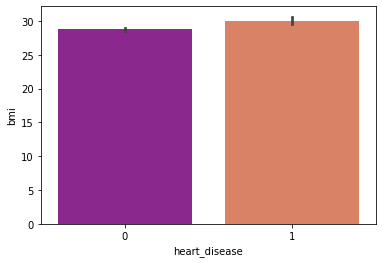

In [100]:
# this graph shows that the average bmi of people eith heart disease is more than the people without heart disease 
# considering the 1 as heart disease and 0 as normal person


sns.barplot(x ='heart_disease', y ='bmi', data = dataset,  
            palette ='plasma')

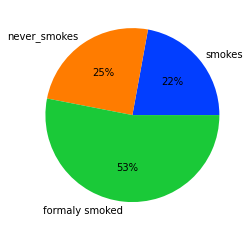

In [101]:
smokes = dataset['smoking_status'].value_counts()['smokes']
never_smokes = dataset['smoking_status'].value_counts()['formerly smoked']
formaly_smokes = dataset['smoking_status'].value_counts()['never smoked']

data = [smokes,never_smokes,formaly_smokes]
labels = ['smokes', 'never_smokes', 'formaly smoked']
colors = sns.color_palette('bright')
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')
plt.show()

<AxesSubplot:xlabel='work_type', ylabel='bmi'>

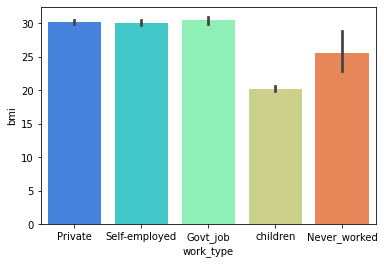

In [102]:
# this shows the children has the least bmi as compared to others

sns.barplot(x='work_type',y='bmi',data=dataset, palette='rainbow')

# REMOVING OUTLIER FROM BMI AND GLUCOSE LEVEL

In [103]:


outliers=[]

def detect_outlier(data_1):
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)   




detect_outlier(dataset['bmi'])
dataset = dataset[dataset.bmi.isin(outliers) == False]
outliers=[]
detect_outlier(dataset['avg_glucose_level'])
dataset = dataset[dataset.avg_glucose_level.isin(outliers) == False]



# MINMAX SCALER 

In [104]:
 
scaler = MinMaxScaler()

dataset[['id','age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']] = scaler.fit_transform(dataset[['id','age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']])

dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,Male,0.816895,0.0,1.0,Yes,Private,Urban,0.934478,0.632212,formerly smoked,1.0
1,0.708205,Female,0.743652,0.0,0.0,Yes,Self-employed,Rural,0.791913,0.427885,never smoked,1.0
2,0.426015,Male,0.975586,0.0,1.0,Yes,Private,Rural,0.273501,0.533654,never smoked,1.0
3,0.824928,Female,0.597168,0.0,0.0,Yes,Private,Urban,0.625121,0.579327,smokes,1.0
4,0.021929,Female,0.963379,1.0,0.0,Yes,Self-employed,Rural,0.640681,0.329327,never smoked,1.0


# LABEL ENCODER 

In [105]:
label_encoder = LabelEncoder()
dataset['gender'] = label_encoder.fit_transform(dataset['gender'])
dataset['ever_married'] = label_encoder.fit_transform(dataset['ever_married'])
dataset['work_type'] = label_encoder.fit_transform(dataset['work_type'])
dataset['Residence_type'] = label_encoder.fit_transform(dataset['Residence_type'])
dataset['smoking_status'] = label_encoder.fit_transform(dataset['smoking_status'])

dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,1,0.816895,0.0,1.0,1,2,1,0.934478,0.632212,1,1.0
1,0.708205,0,0.743652,0.0,0.0,1,3,0,0.791913,0.427885,2,1.0
2,0.426015,1,0.975586,0.0,1.0,1,2,0,0.273501,0.533654,2,1.0
3,0.824928,0,0.597168,0.0,0.0,1,2,1,0.625121,0.579327,3,1.0
4,0.021929,0,0.963379,1.0,0.0,1,3,0,0.640681,0.329327,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.249297,0,0.975586,1.0,0.0,1,2,1,0.154140,0.427885,2,0.0
5106,0.614850,0,0.987793,0.0,0.0,1,3,1,0.377302,0.713942,2,0.0
5107,0.269730,0,0.426270,0.0,0.0,1,3,0,0.150048,0.487981,2,0.0
5108,0.514278,1,0.621582,0.0,0.0,1,2,0,0.598525,0.367788,1,0.0


# ADDING 2 NEW FEATURES

In [106]:
dataset_clone = dataset_clone.fillna(dataset_clone['bmi'].median())
feature=[]

for i,rows in dataset_clone.iterrows():

    if rows["bmi"] <= 18.5:

        feature.append("UNDERWEIGHT")    

    elif rows["bmi"] <= 24.9:  

        feature.append("HEALTHY")  

    elif rows["bmi"] <= 29.9:  

        feature.append("OVERWEIGHT")  

    else:  

        feature.append("OBESE")

dataset_clone['Bmi_Details'] = feature

dataset_clone.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Bmi_Details
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,OBESE
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,OVERWEIGHT
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,OBESE
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,OBESE
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,HEALTHY


In [108]:
feature=[]

for i,rows in dataset_clone.iterrows():

    if rows["heart_disease"] == 1 and rows["stroke"] == 1 :

        feature.append("Less")    

    elif rows["heart_disease"] == 0 and rows["stroke"] == 0 :
    
        feature.append("More")          

    else:  

        feature.append("Average")

dataset_clone['Life_Span'] = feature

dataset_clone.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Bmi_Details,Life_Span
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,OBESE,Less
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,OVERWEIGHT,Average
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,OBESE,Less
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,OBESE,Average
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,HEALTHY,Average
